In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
dt = pd.read_csv(r'static\fertilizer.csv')
dt.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nitrogen         99 non-null     int64 
 1   Potassium        99 non-null     int64 
 2   Phosphorous      99 non-null     int64 
 3   Fertilizer Name  99 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [4]:
dt.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [5]:
dt['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

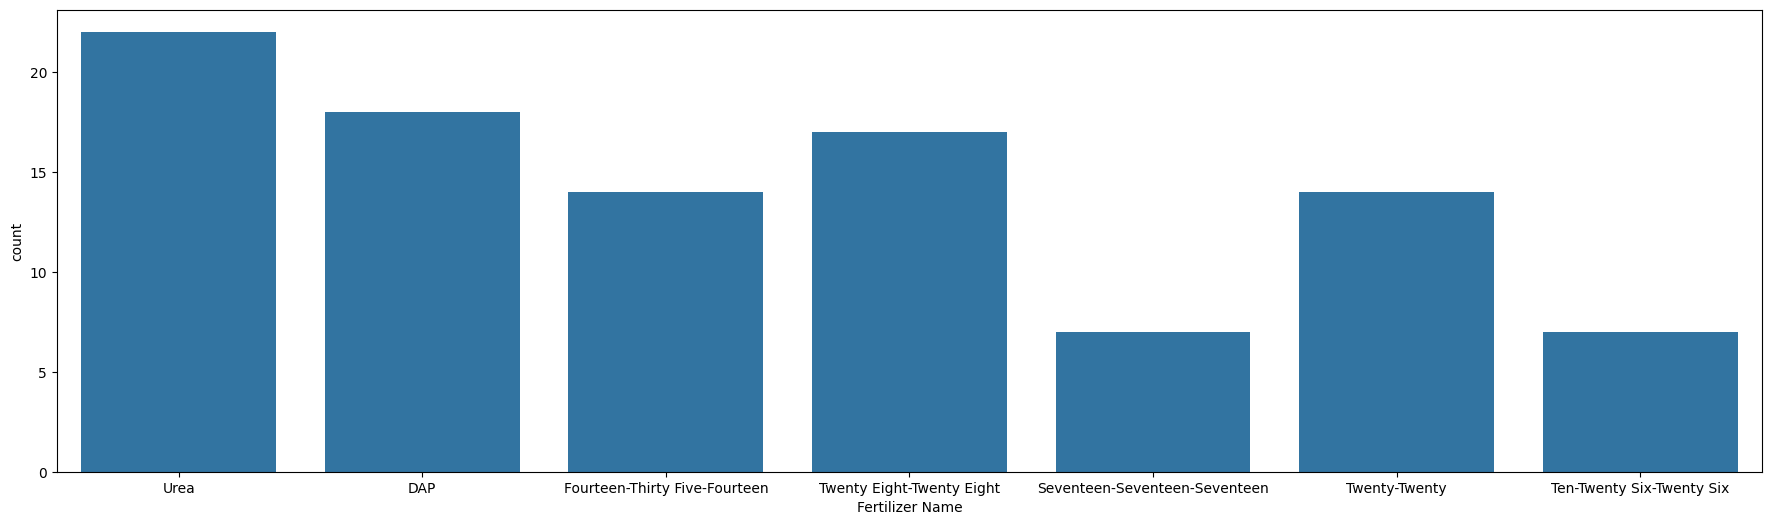

In [6]:
import seaborn as sns 
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data=dt)

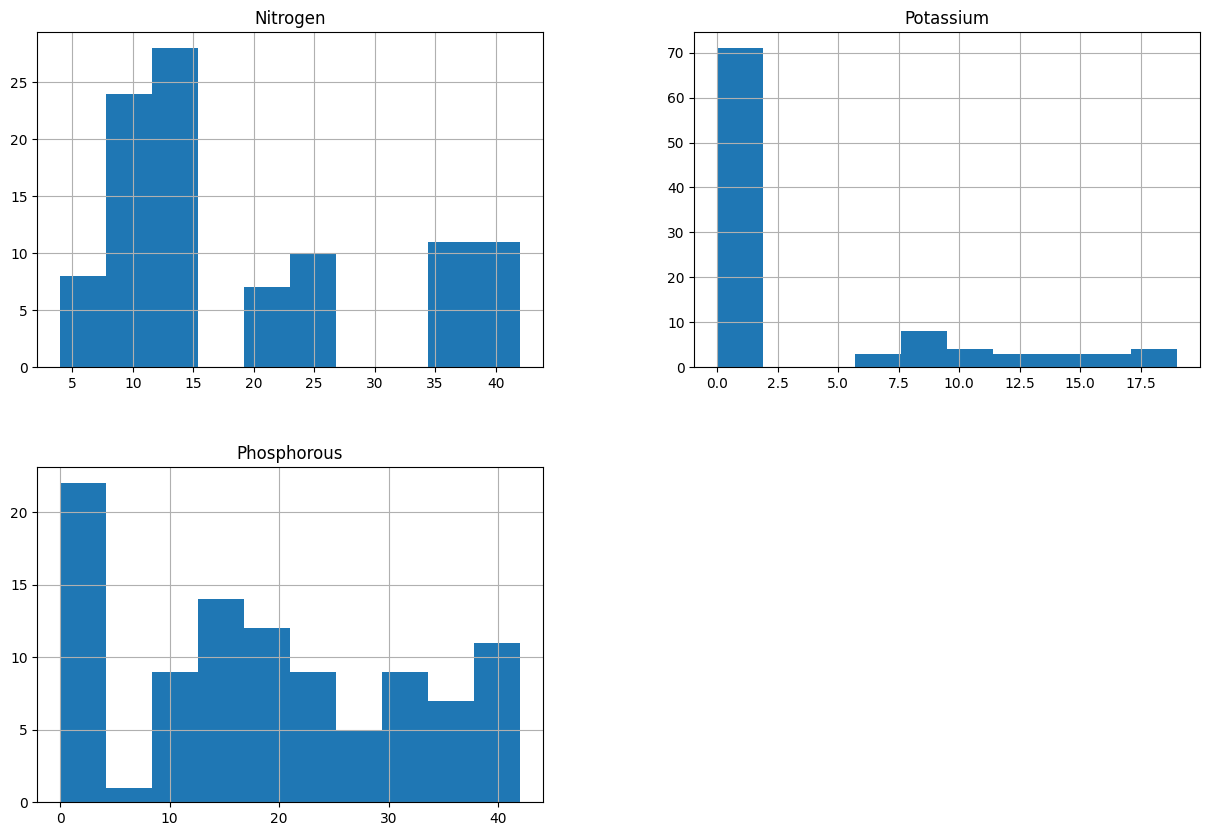

In [7]:
dt.hist(figsize=(15,10))
plt.show()

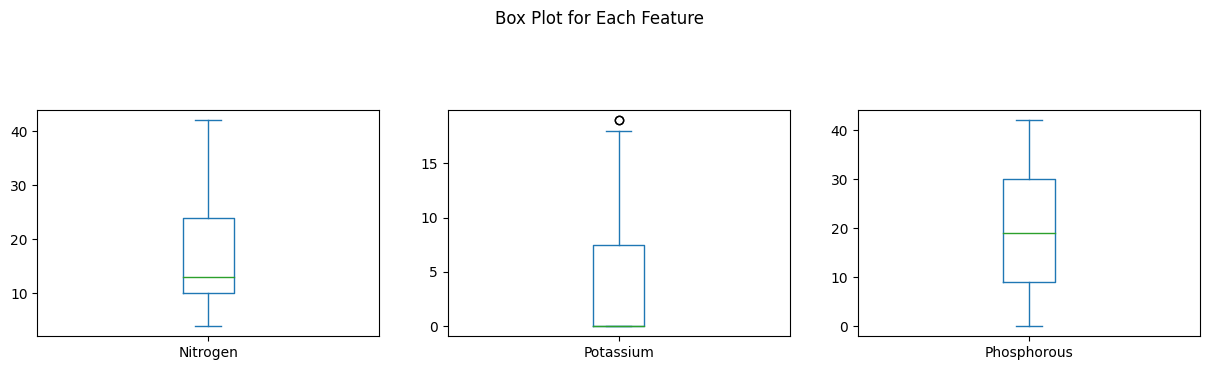

In [8]:
dt.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()

In [9]:
corr = dt.drop(columns=['Fertilizer Name']).corr()
corr

,Nitrogen,Potassium,Phosphorous
Nitrogen,1.000000,-0.500087,-0.686971
Potassium,-0.500087,1.000000,0.089192
Phosphorous,-0.686971,0.089192,1.000000


<Axes: >

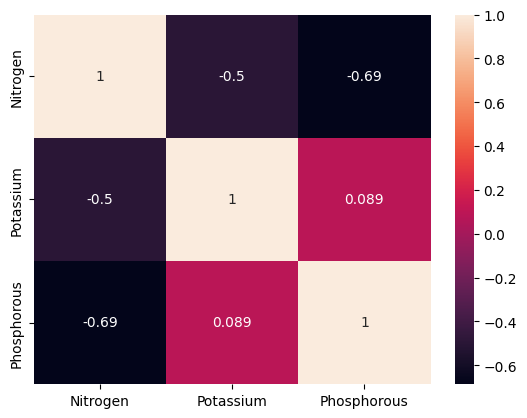

In [10]:
sns.heatmap(corr, annot = True, cbar = True)

There is a considerable negative correlation between nitrogen and phosphorus

In [11]:
X = dt.drop(columns=['Fertilizer Name'])
y = dt['Fertilizer Name']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[0]

array([ 0.46072126, -0.57643157,  0.09092764])

In [13]:
X_test

array([[ 0.46072126, -0.57643157,  0.16743993],
       [-0.49732651, -0.57643157, -0.36814607],
       [-1.28118377,  2.51103066, -0.06209693],
       [ 1.76715002, -0.57643157, -1.3628058 ],
       [-0.323136  , -0.57643157,  1.77419795],
       [ 0.1994355 , -0.57643157,  0.77953822],
       [ 1.59295952, -0.57643157, -1.3628058 ],
       [ 0.28653075, -0.57643157,  0.47348908],
       [-0.49732651, -0.57643157,  1.69768566],
       [ 1.59295952, -0.57643157, -1.3628058 ],
       [-0.58442176, -0.57643157,  1.69768566],
       [ 0.28653075, -0.57643157,  0.24395222],
       [ 0.46072126, -0.57643157,  0.01441536],
       [-0.84570751,  1.05810726,  0.85605051],
       [-0.75861226, -0.57643157,  1.31512423],
       [ 1.41876902, -0.57643157, -1.3628058 ],
       [-0.67151701, -0.57643157,  1.4681488 ],
       [ 1.50586427, -0.57643157, -1.3628058 ],
       [-0.58442176,  2.69264608,  0.09092764],
       [ 2.02843578, -0.57643157, -1.3628058 ],
       [-1.19408852,  1.05810726,  0.856

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=124)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=124)

In [15]:
from sklearn.svm import SVC

svmc = SVC(kernel='sigmoid',random_state=42)
svmc.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
y_svmpred = svmc.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


1.0

In [19]:

cmsvm = confusion_matrix(y_test,y_pred)
print(cmsvm)
accuracy_score(y_test,y_svmpred)

[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]


0.9

In [20]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
dt['Fertilizer Name']=encode_ferti.fit_transform(dt['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [21]:
feat = np.array([[18,46,0]])
res = classifier.predict(feat)[0]
res

'Ten-Twenty Six-Twenty Six'

In [22]:

rest = svmc.predict(feat)[0]
rest

'Fourteen-Thirty Five-Fourteen'